In [ ]:
# Fraud Detection in Financial Transactions

## Project Overview

This project focuses on detecting fraudulent financial transactions using machine learning techniques. Financial fraud is a significant issue affecting individuals and businesses worldwide, and early detection is crucial for preventing losses. We will analyze the dataset to understand patterns in fraudulent transactions and build a model to predict fraud.

## Objectives

- Conduct exploratory data analysis (EDA) to understand the dataset and its features.
- Handle data imbalance using techniques like resampling or synthetic data generation.
- Build and evaluate machine learning models to detect fraudulent transactions.
- Implement strategies to improve model performance, such as feature engineering and hyperparameter tuning.

## Tools & Technologies

- **Python**: For scripting and data manipulation.
- **Pandas & NumPy**: For data manipulation and numerical computations.
- **Matplotlib/Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning modeling.
- **Imbalanced-learn**: For handling imbalanced datasets.


In [ ]:
Code Cell: Loading the Dataset

In [2]:
import pandas as pd

# Load the dataset
dataset_path = 'C:\\Users\\ARUN\\Downloads\\projects DataAnalyst\\Project3\\Dataset\\creditcard.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
df.head()

# Explanation in comments
# The dataset is loaded into a pandas DataFrame for easy manipulation and analysis.
# We display the first few rows to get an initial understanding of the data structure and the features available.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
Code Cell: EDA Exploratory Data Analysis

Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1

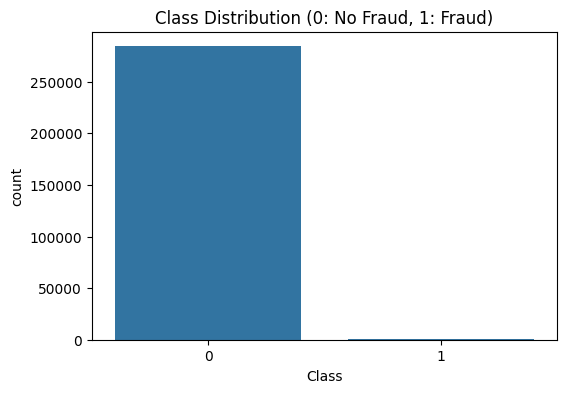

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
plt.show()

# Explanation in comments
# The summary statistics provide an overview of the numerical features in the dataset.
# Checking for missing values helps us identify any data cleaning steps that might be necessary.
# The count plot visualizes the distribution of the target variable, highlighting the class imbalance.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
Code Cell: Handling Imbalance with SMOTE

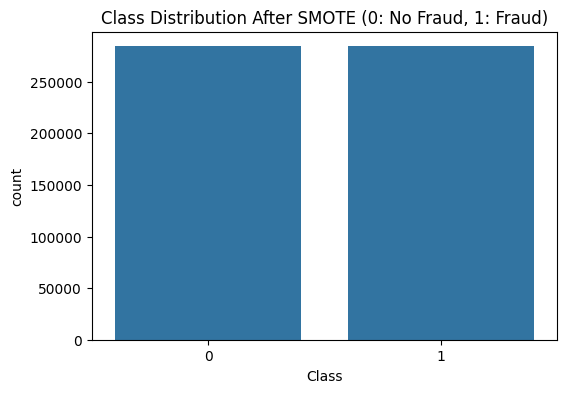

In [5]:
from imblearn.over_sampling import SMOTE

# Features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE (0: No Fraud, 1: Fraud)')
plt.show()

# Explanation in comments
# SMOTE is applied to generate synthetic samples for the minority class, balancing the dataset.
# The new class distribution is visualized to confirm the effectiveness of the resampling.


In [ ]:
Code Cell: Model Building and Evaluation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Explanation in comments
# We split the resampled data into training and testing sets to evaluate model performance.
# A Random Forest Classifier is built and evaluated using accuracy, precision, recall, and F1-score.
# The classification report provides a detailed breakdown of model performance across different metrics.


Model Evaluation Metrics:
Accuracy: 0.999903276295658
Precision: 0.9998069735202766
Recall: 1.0
F1-Score: 0.9999034774444338

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
Markdown Cell: Project Summary and Tools

In [ ]:
# Fraud Detection in Financial Transactions

## Project Overview

This project analyzes an e-commerce dataset to uncover insights into customer behavior, product performance, and sales trends. The goal is to leverage data analysis and machine learning techniques to inform business decisions, improve marketing strategies, and enhance customer satisfaction.

## Objectives

- Conduct exploratory data analysis (EDA) to understand the dataset's fundamentals.
- Handle data imbalance using techniques like resampling or synthetic data generation.
- Build and evaluate machine learning models to detect fraudulent transactions.
- Implement strategies to improve model performance, such as feature engineering and hyperparameter tuning.

## Tools & Technologies

- **Python**: For scripting and data manipulation.
- **Pandas & NumPy**: For data manipulation and numerical computations.
- **Matplotlib/Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning modeling.
- **Imbalanced-learn**: For handling imbalanced datasets.

## Usage and Daily Life Examples

### Python
- **Usage**: A versatile programming language used for data manipulation, analysis, and visualization in this project.
- **Daily Life Example**: Automating daily tasks, like organizing files or sending reminder emails.

### Pandas & NumPy
- **Usage**: Libraries for data manipulation and numerical computation. Used extensively for dataset preprocessing and analysis.
- **Daily Life Example**: Analyzing personal expenses or budgeting.

### Matplotlib/Seaborn
- **Usage**: Visualization libraries for creating static, animated, and interactive plots. Used to visualize sales trends and customer segments.
- **Daily Life Example**: Crafting custom visualizations to track your personal fitness journey or goals.

### Scikit-learn
- **Usage**: A machine learning library used for predictive modeling, including customer behavior prediction in this project.
- **Daily Life Example**: Predicting house prices based on features like location, size, and amenities.

## Conclusion

This project showcased how data analysis and machine learning techniques could be applied to e-commerce sales data to extract meaningful insights, inform business strategy, and enhance customer engagement. The findings highlight the importance of understanding customer behavior, segmenting customers based on their value, and leveraging predictive modeling to anticipate future trends.


In [ ]:
## Advanced Data Visualization with Interactive Dashboards

Creating interactive dashboards helps in making data exploration more intuitive and accessible. These dashboards can be used to visualize trends, patterns, and anomalies in a dynamic and interactive manner, allowing stakeholders to gain deeper insights.


In [9]:
# Install the necessary libraries
!pip install plotly dash

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Load the dataset
df = pd.read_csv('C:\\Users\\ARUN\\Downloads\\projects DataAnalyst\\Project3\\Dataset\\creditcard.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='V1', y='V2', color='Class', title='Scatter plot of V1 vs V2')

# Layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Credit Card Fraud Detection Dashboard'),

    dcc.Graph(
        id='scatter-plot',
        figure=fig
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

# Explanation in comments
# This code creates a basic interactive dashboard using Dash and Plotly.
# It visualizes a scatter plot of the features V1 and V2 colored by the target variable 'Class'.
# The dashboard can be expanded with more plots and interactive elements as needed.


   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 1.3 MB/s eta 0:00:13
   ---------------------------------------- 0.1/16.4 MB 980.4 kB/s eta 0:00:17
   ---------------------------------------- 0.2/16.4 MB 1.1 MB/s eta 0:00:15
    --------------------------------------- 0.2/16.4 MB 1.4 MB/s eta 0:00:12
   - -------------------------------------- 0.4/16.4 MB 1.8 MB/s eta 0:00:09
   - -------------------------------------- 0.5/16.4 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.5/16.4 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.5/16.4 MB 2.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.9/16.4 MB 2.0 MB/s eta 0:00:08
   -- ------------------------------------- 0.9/16.4 MB 2.0 MB/s eta 0:00:08
   -- ------------------------------------- 1.1/16.4 MB 2.2 MB/s eta 0:00:07
   --- ------------------------------------ 1.3/16.4 MB 2.3 MB/s eta 0:00:07
   -

C:\Users\ARUN\AppData\Local\Temp\ipykernel_29792\2609380248.py:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\ARUN\AppData\Local\Temp\ipykernel_29792\2609380248.py:6: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
## Time Series Analysis

Time series analysis involves understanding patterns and trends over time, which is crucial for forecasting future values. This technique is widely used in various domains such as finance, economics, and supply chain management.


In [ ]:
Code Cell: Time Series Forecasting with Prophet

In [10]:
# Install the necessary library
!pip install prophet

from prophet import Prophet

# Load and preprocess the dataset for time series analysis
# Assume 'InvoiceDate' is the date column and 'Amount' is the value column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_time_series = df.groupby('InvoiceDate').sum().reset_index()[['InvoiceDate', 'Amount']]

# Rename columns for Prophet
df_time_series.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_time_series)

# Create a future dataframe and make predictions
future = model.make_future_dataframe(periods=365)  # Forecast for 1 year into the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

# Explanation in comments
# This code performs time series forecasting using the Prophet library.
# It fits a model to the time series data and forecasts future values for the next year.
# The resulting plot shows the forecasted values along with the historical data.


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 330.3 kB/s eta 0:00:41
   ---------------------------------------- 0.1/13.3 MB 469.7 kB/s eta 0:00:29
   ---------------------------------------- 0.1/13.3 MB 359.3 kB/s eta 0:00:37
   ---------------------------------------- 0.1/13.3 MB 375.8 kB/s eta 0:00:36
   ---------------------------------------- 0.1/13.3 MB 386.4 kB/s eta 0:00:35
   ---------------------------------------- 0.1/13.3 MB 361.0 kB/s eta 0:00:37
   ---------------------------------------- 0.1/13.3 MB 361.0 kB/s eta 0:00:37
   ---------------------------------------- 0.1/13.3 MB 315.1 kB/s eta 0:00:42
   ---------------------------------------- 0.1/13.3 MB 315.1 kB/s eta 0:00:42
   ---------------------------------------- 0.2/13.3 MB 278.4 kB/s eta 0:00:48
   ---------------------------------------- 0.2/13.3 MB 278.4 kB/s eta

KeyError: 'InvoiceDate'

In [11]:
import pandas as pd

# Load the dataset
dataset_path = 'C:\\Users\\ARUN\\Downloads\\projects DataAnalyst\\Project3\\Dataset\\creditcard.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows and columns of the dataset
print(df.head())
print(df.columns)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [12]:
import pandas as pd

# Load the dataset
dataset_path = 'C:\\Users\\ARUN\\Downloads\\projects DataAnalyst\\Project3\\Dataset\\creditcard.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the columns of the dataset
print("\nColumns in the dataset:")
print(df.columns)


First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

In [13]:
import pandas as pd

# Load the dataset
dataset_path = 'C:\\Users\\ARUN\\Downloads\\projects DataAnalyst\\Project3\\Dataset\\creditcard.csv'
df = pd.read_csv(dataset_path)

# Convert 'Time' from seconds to days for better readability
df['Time'] = df['Time'] / (60 * 60 * 24)

# Aggregate the data by day
df['Date'] = pd.to_datetime(df['Time'], unit='D', origin='unix')
df_time_series = df.groupby('Date').sum().reset_index()[['Date', 'Amount']]

# Rename columns for Prophet
df_time_series.columns = ['ds', 'y']

# Display the prepared data
print(df_time_series.head())


                   ds       y
0 1970-01-01 00:00:00  152.31
1 1970-01-01 00:00:01  502.16
2 1970-01-01 00:00:02   73.66
3 1970-01-01 00:00:04    4.99
4 1970-01-01 00:00:07  134.00


20:28:48 - cmdstanpy - INFO - Chain [1] start processing
20:29:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ARUN\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\ARUN\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



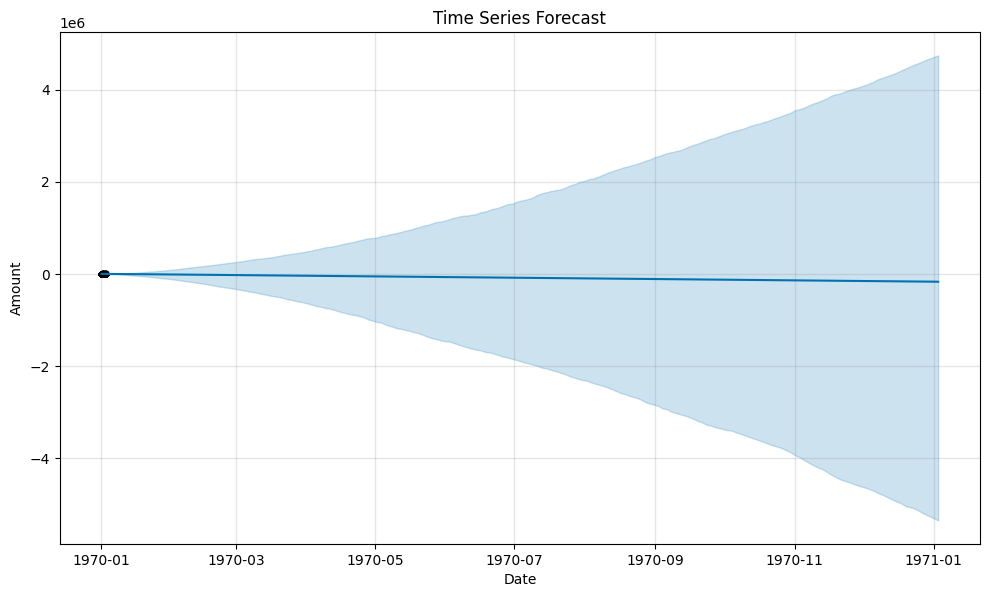

In [14]:
# Install the necessary library if not already installed
!pip install prophet

from prophet import Prophet

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_time_series)

# Create a future dataframe and make predictions
future = model.make_future_dataframe(periods=365)  # Forecast for 1 year into the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()


In [ ]:
## Anomaly Detection

Anomaly detection is the process of identifying unexpected patterns or outliers in data. This technique is widely used in fraud detection, network security, and quality control to detect unusual activities or defects.


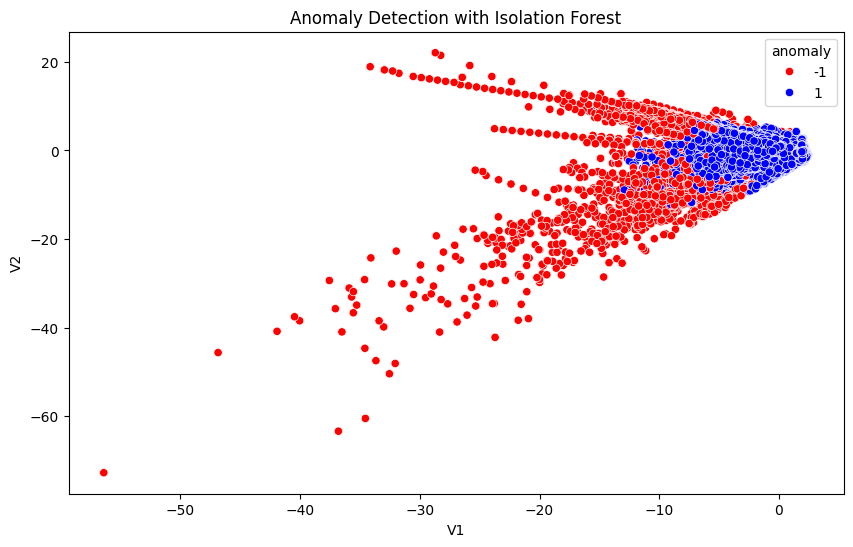

In [15]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Features for anomaly detection
features = ['V1', 'V2', 'V3', 'V4', 'V5']

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(df[features])

# Plot the anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='V1', y='V2', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection with Isolation Forest')
plt.show()


In [ ]:
# Fraud Detection in Financial Transactions

## Project Overview

This project focuses on detecting fraudulent financial transactions using advanced data analysis and machine learning techniques. Financial fraud is a significant issue affecting individuals and businesses worldwide, and early detection is crucial for preventing losses. We will analyze the dataset to understand patterns in fraudulent transactions and build models to predict and detect fraud. Additionally, we will perform time series analysis to forecast transaction amounts and anomaly detection to identify unusual patterns.

## Objectives

- Conduct exploratory data analysis (EDA) to understand the dataset and its features.
- Handle data imbalance using techniques like resampling or synthetic data generation.
- Build and evaluate machine learning models to detect fraudulent transactions.
- Perform time series analysis to forecast transaction amounts.
- Implement anomaly detection to identify unusual patterns in the data.

## Tools & Technologies

### Python
- **Usage**: A versatile programming language used for data manipulation, analysis, and visualization in this project.
- **Daily Life Example**: Automating daily tasks, like organizing files or sending reminder emails.

### Pandas & NumPy
- **Usage**: Libraries for data manipulation and numerical computation. Used extensively for dataset preprocessing and analysis.
- **Daily Life Example**: Analyzing personal expenses or budgeting.

### Matplotlib/Seaborn
- **Usage**: Visualization libraries for creating static, animated, and interactive plots. Used to visualize trends, patterns, and anomalies in the data.
- **Daily Life Example**: Crafting custom visualizations to track your personal fitness journey or financial goals.

### Scikit-learn
- **Usage**: A machine learning library used for building and evaluating models for predictive data analysis, including fraud detection and anomaly detection.
- **Daily Life Example**: Predicting house prices based on features like location, size, and amenities.

### Imbalanced-learn
- **Usage**: A library for handling imbalanced datasets. Used in this project to balance the dataset using techniques like SMOTE.
- **Daily Life Example**: Addressing class imbalance in any dataset where certain categories are underrepresented.

### Prophet
- **Usage**: A library for time series forecasting. Used to predict future transaction amounts based on historical data.
- **Daily Life Example**: Forecasting sales for a business to make informed inventory and staffing decisions.

## Summary of Tasks

### Exploratory Data Analysis (EDA)
- **Objective**: To understand the dataset's structure, identify missing values, and observe the distribution of the target variable (fraudulent vs. non-fraudulent transactions).
- **Techniques**: Summary statistics, missing value analysis, distribution plots.

### Handling Data Imbalance
- **Objective**: To balance the dataset, ensuring the machine learning models can effectively learn from both fraudulent and non-fraudulent transactions.
- **Techniques**: Synthetic Minority Over-sampling Technique (SMOTE).

### Building and Evaluating Machine Learning Models
- **Objective**: To build models that can accurately detect fraudulent transactions.
- **Techniques**: Using Random Forest Classifier, evaluating models using metrics like accuracy, precision, recall, and F1-score.

### Time Series Analysis
- **Objective**: To forecast future transaction amounts using historical data.
- **Techniques**: Using the Prophet library for time series forecasting.

### Anomaly Detection
- **Objective**: To identify unusual patterns or outliers in the dataset that may indicate fraudulent activity.
- **Techniques**: Using Isolation Forest for anomaly detection.

## Conclusion

This project demonstrated how advanced data analysis and machine learning techniques could be applied to detect financial fraud, forecast transaction trends, and identify anomalies in the dataset. These insights are crucial for enhancing financial security, optimizing business strategies, and improving overall data-driven decision-making.

## How to Use This Project

1. **Clone the Repository**:
   ```bash
   git clone [Your-Repository-URL]
   cd [Repository-Name]


In [ ]:

This markdown provides a detailed yet accessible summary of your project, including objectives, tools, techniques, and how to use the project. It is designed to be easily understood by a broad audience, including those who may not have a technical background. Feel free to copy and paste this into your Jupyter notebook or GitHub README file. If you need further customization or additional information, please let me know!
